In [1]:
# library imports
import numpy as np # calculations
import matplotlib . pyplot as plt # plotting

# be explicit about units
meter = 1
millimeter = 10** -3 * meter
nanometer = 10** -9 * meter


#Import plotting functions, and the Fraunhofer FFT propagation
from comp_optics_utilities import *


In [2]:
#Utility function
def slit(y, c, w):
    return np.logical_and( (y - c) < w/2, (y - c) > -w/2)

#function that defines the 1d slit pattern for a double slit pair
def double_slit_pair(x):
    
    #slit parameters
    slit_separation = 0.2* millimeter
    
    slit_width = 0.1 * millimeter
    
    pair_separation = 1 * millimeter
    

    
    #Assemble the four slits, we can just add each slit, since they dont overlap
    res = slit(x, pair_separation/ 2 + slit_separation/ 2, slit_width)
    res += slit(x, pair_separation/ 2 - slit_separation/ 2, slit_width)
    
    res += slit(x, -pair_separation/ 2 + slit_separation/ 2, slit_width)
    res += slit(x, -pair_separation/ 2 - slit_separation/ 2, slit_width)
    
    
    return res

In [ ]:
###TASK: Sample the double slit pair over a region of total size 20 millimeters
#Select the correct number of sample points so that the final region at 10m propagation is 64cm
#of course the number of samples will remain constant. To do this set l, N, and correctly call the Fraunhofer
#propagation
#Hint: N is a power of 2

#The slits make up such a small region of our sample initial condition so that we can get good resolution
#at the propagated plane.

#The scale factor s for N samples, over a region of width 2l, at a plane L away is s = [N * lambda * L / (2l)^2]

N = #Fill in
l = #Fill in

#Generate N equally spaced samples along the initial conditions
boundary_coordinates =  np.linspace(-l, l, N)

#Sample the double slit function at those points
boundary_amplitude_samples = double_slit_pair(boundary_coordinates)

#Plot the double slit intensity, using a plotting function
plot_intensity_1d(boundary_coordinates, boundary_amplitude_samples, "Double Slit Pair")

In [4]:
L = 10 * meter
_lambda = 500 * nanometer

coordinates_prime, A_prime = #Fill in, call the Fraunhofer propagation from comp_optics_utilities.py


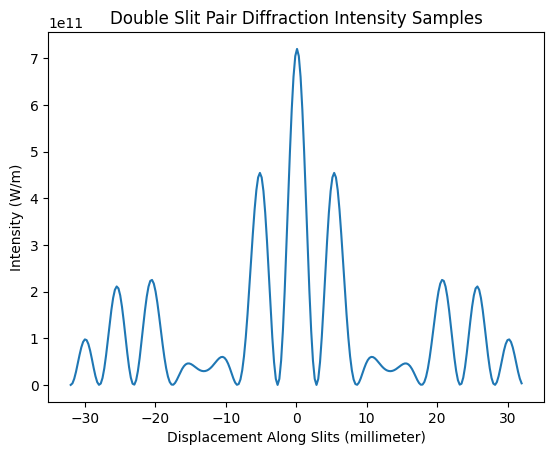

In [5]:
plot_intensity_1d_line(coordinates_prime, A_prime, "Double Slit Pair Diffraction")

In [6]:
#Using the convolution theorem for discrete Fourier transform (see handout)
def circular_convolve(f,g):
    return np.fft.ifftshift(np.fft.ifft(np.fft.fft(np.fft.fftshift(f)) * np.fft.fft(np.fft.fftshift(g))))

In [7]:
#Import an existing diffraction result and calculate its intensity
intensity_prime = 1/2 * np.abs(np.load("amplitudes_correct_double_slit_pair.npy"))**2
coordinates_convolve = np.load("coordinates_correct_double_slit_pair.npy")

Text(0.5, 1.0, 'Theoretical intensity')

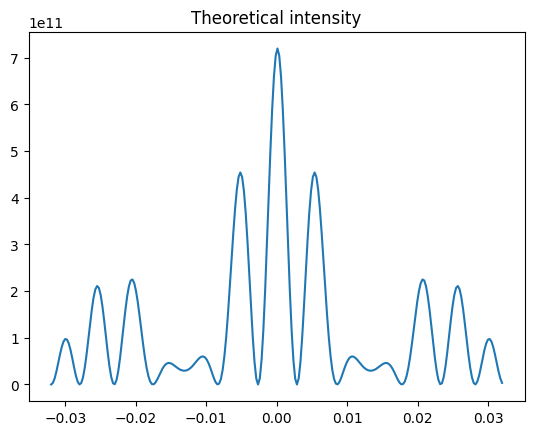

In [8]:
#Plot the intensity
plt.plot(coordinates_convolve,intensity_prime)
plt.title("Theoretical intensity")

In [9]:
def boxcar(x,w):
    return np.logical_and(x < w/2, x > -w/2)

In [10]:
#10mm finite observer represented by a boxcar
bc = boxcar(coordinates_convolve, 10 * millimeter) 

In [11]:
###Task use the numpy.convolve function to calculate the true convolution of the 10 millimeter boxcar
#and the provided intensity. Then run the code to do a calculation of the circular convolution.
#The mode argument of numpy.convolve is crucial, you want to pick it so that the number of samples remains N
#not more not less

###Task answer the following questions
#What differences do you notice between the results of the functions circular_convolve, and numpy.convolve? 
#Where are differences most prominent?

intensity_measured = #Fill in, call np.convolve on bc and the theoretical intensity

In [12]:
intensity_circular_convolved = circular_convolve(intensity_prime, bc)

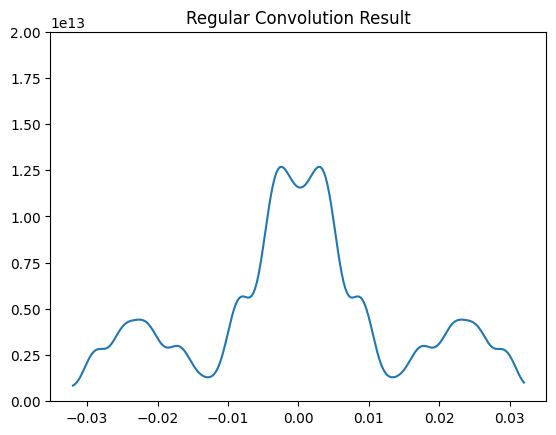

In [13]:
plt.plot(coordinates_convolve,intensity_measured )
plt.title("Regular Convolution Result")
plt.gca().set_ylim([0,2*10**13])


/home/ben/.espressif/python_env/idf5.0_py3.8_env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


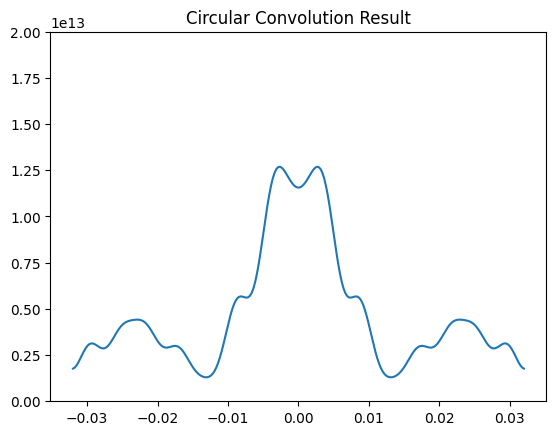

In [14]:
plt.plot(coordinates_convolve,intensity_circular_convolved)
plt.title("Circular Convolution Result")
plt.gca().set_ylim([0,2*10**13])
